Question 1

In [2]:
# Step 2 & 3 : Importing dataset from the given address and assigning it to a variable users
url = r"https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"
users = pd.read_csv(url, delimiter = "|")
display(users.head())

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [3]:
# Step 4 : Discover what is the mean age per occupation
users.groupby(by = "occupation").mean()["age"]

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [4]:
# Step 5 : Discover the Male ratio per occupation and sort it from the most to the least
males_only = users[users["gender"] == "M"].groupby(by = "occupation")["gender"].count()
total = users.groupby(by = "occupation")["gender"].count()

temp = (males_only / total).sort_values(ascending = False)
display(temp)

occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
Name: gender, dtype: float64

In [5]:
# Step 6 : For each occupation, calculate the minimum and maximum ages
users.groupby(by = "occupation")["age"].describe()[["min", "max"]]

,min,max
occupation,,
administrator,21.0,70.0
artist,19.0,48.0
doctor,28.0,64.0
educator,23.0,63.0
engineer,22.0,70.0
entertainment,15.0,50.0
executive,22.0,69.0
healthcare,22.0,62.0
homemaker,20.0,50.0


In [6]:
# Step 7 : For each combination of occupation and sex, calculate the mean age
users.groupby(by = ["occupation", "gender"]).mean()[["age"]]

age
occupation    gender           
administrator F       40.638889
              M       37.162791
artist        F       30.307692
              M       32.333333
doctor        M       43.571429
educator      F       39.115385
              M       43.101449
engineer      F       29.500000
              M       36.600000
entertainment F       31.000000
              M       29.000000
executive     F       44.000000
              M       38.172414
healthcare    F       39.818182
              M       45.400000
homemaker     F       34.166667
              M       23.000000
lawyer        F       39.500000
              M       36.200000
librarian     F       40.000000
              M       40.000000
marketing     F       37.200000
              M       37.875000
none          F       36.500000
              M       18.600000
other         F       35.472222
              M       34.028986
programmer    F       32.166667
              M       33.216667
retired       F       70.000000
              M       62.538462
salesman      F       27.000000
              M       38.555556
scientist     F       28.333333
              M       36.321429
student       F       20.750000
              M       22.669118
technician    F       38.000000
              M       32.961538
writer        F       37.631579
              M       35.346154

In [7]:
# Step 8 : For each occupation present the percentage of women and men
pd.DataFrame(users.groupby(by = "occupation")["gender"].value_counts(normalize = True)).rename(columns={"gender":"percentage"})

percentage
occupation    gender            
administrator M         0.544304
              F         0.455696
artist        M         0.535714
              F         0.464286
doctor        M         1.000000
educator      M         0.726316
              F         0.273684
engineer      M         0.970149
              F         0.029851
entertainment M         0.888889
              F         0.111111
executive     M         0.906250
              F         0.093750
healthcare    F         0.687500
              M         0.312500
homemaker     F         0.857143
              M         0.142857
lawyer        M         0.833333
              F         0.166667
librarian     F         0.568627
              M         0.431373
marketing     M         0.615385
              F         0.384615
none          M         0.555556
              F         0.444444
other         M         0.657143
              F         0.342857
programmer    M         0.909091
              F         0.090909
retired       M         0.928571
              F         0.071429
salesman      M         0.750000
              F         0.250000
scientist     M         0.903226
              F         0.096774
student       M         0.693878
              F         0.306122
technician    M         0.962963
              F         0.037037
writer        M         0.577778
              F         0.422222

#### Question 2

In [8]:
# Step 1 : Import the necessary libraries
import pandas as pd

In [9]:
# Step 2 & 3 : Import the dataset from the given address and assign it to a variable called euro12
url = r"https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"
euro12 = pd.read_csv(url)
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [10]:
# Step 4 : Select only the Goal column
euro12[["Goals"]]

,Goals
0,4
1,4
2,4
3,5
4,3
5,10
6,5
7,6
8,2
9,2


In [11]:
# Step 5 : How many teams participated in the Euro2012?
print("Number of teams that participated in EURO 2012 are : {}".format(len(euro12["Team"].unique())))

Number of teams that participated in EURO 2012 are : 16


In [12]:
# Step 6 : What is the number of columns in the dataset?
print("Number of columns in the dataset are : {}".format(euro12.shape[1]))

Number of columns in the dataset are : 35


In [13]:
# Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline
discipline = euro12[["Team", "Red Cards", "Yellow Cards"]]
discipline.head()

,Team,Red Cards,Yellow Cards
0,Croatia,0,9
1,Czech Republic,0,7
2,Denmark,0,4
3,England,0,5
4,France,0,6


In [14]:
# Step 8 : Sort the teams by Red Cards, then to Yellow Cards
discipline.sort_values(by = ["Red Cards", "Yellow Cards"])

,Team,Red Cards,Yellow Cards
2,Denmark,0,4
5,Germany,0,4
3,England,0,5
8,Netherlands,0,5
15,Ukraine,0,5
4,France,0,6
12,Russia,0,6
1,Czech Republic,0,7
14,Sweden,0,7
0,Croatia,0,9


In [15]:
# Step 9 : Calculate the mean Yellow Cards given per Team
discipline.groupby(by = "Team")["Yellow Cards"].mean()

Team
Croatia                 9.0
Czech Republic          7.0
Denmark                 4.0
England                 5.0
France                  6.0
Germany                 4.0
Greece                  9.0
Italy                  16.0
Netherlands             5.0
Poland                  7.0
Portugal               12.0
Republic of Ireland     6.0
Russia                  6.0
Spain                  11.0
Sweden                  7.0
Ukraine                 5.0
Name: Yellow Cards, dtype: float64

In [16]:
# Step 10 : Filter teams that scored more than 6 goals
euro12.loc[euro12["Goals"] > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [17]:
# Step 11 : Select the teams that start with G
euro12.loc[euro12['Team'].apply(lambda x : True if x[0] == "G" else False)]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [18]:
# Step 12 : Select the first 7 columns
euro12.iloc[:, :7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [19]:
# Step 13 : Select all columns except the last 3
euro12.iloc[:, :euro12.shape[1] - 3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [20]:
# Step 14 : Present only the Shooting Accuracy from England, Italy and Russia
euro12.loc[euro12["Team"].isin(["England", "Italy", "Russia"])][["Team", "Shooting Accuracy"]]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


#### Question 3

In [21]:
# Step 1 : Import the necessary libraries
import pandas as pd
import numpy as np

In [22]:
# Step 2 : Create 3 differents Series, each of length 100, as follows:
# The first a random number from 1 to 4
# The second a random number from 1 to 3
# The third a random number from 10,000 to 30,000
series1 = pd.Series(np.random.randint(1, 5, 100))
series2 = pd.Series(np.random.randint(1, 4, 100))
series3 = pd.Series(np.random.randint(10000, 30001, 100))

In [23]:
# Step 3 : Create a DataFrame by joinning the Series by column
df = pd.concat([series1, series2, series3], axis = 1)
df.head()

,0,1,2
0,4,1,18872
1,3,1,15519
2,2,2,22816
3,4,1,13958
4,4,2,28586


In [24]:
# Step 4 : Change the name of the columns to bedrs, bathrs, price_sqr_meter
df.rename(columns = {0 : "bedrs", 1 : "bathrs", 2 : "price_sqr_meter"}, inplace = True)
df.head()

,bedrs,bathrs,price_sqr_meter
0,4,1,18872
1,3,1,15519
2,2,2,22816
3,4,1,13958
4,4,2,28586


In [25]:
# Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
bigcolumn = pd.DataFrame(pd.concat([series1, series2, series3], axis = 0))

In [26]:
# Step 6 : Oops it seems it is going only until index 99. Is it true?
print(bigcolumn.index)

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
            ...
            90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
           dtype='int64', length=300)


Yes, as can be seen, there are a total of 300 elements but the indices are all ranging between 0 and 99

In [27]:
# Step 7 : Reindex the DataFrame so it goes from 0 to 299
bigcolumn.reset_index(drop = True, inplace = True)
bigcolumn

,0
0,4
1,3
2,2
3,4
4,4
...,...
295,11061
296,22961
297,24899
298,14553


#### Question 4

In [28]:
#Step 1 : Import the necessary libraries
import pandas as pd

In [29]:
#Step 2 & 3 : Import the dataset from the attached file wind.txt and assign it to a variable called data 
# and replace the first 3 columns by a proper datetime index
data = pd.read_csv(r"wind.txt", delim_whitespace = True)

new_col = data["Yr"].astype("str") + "-" + data["Mo"].astype("str") + "-" + data["Dy"].astype("str")
new_col = pd.to_datetime(new_col, format = "%y-%m-%d")
data = pd.concat([new_col, data], axis = 1)
data.drop(["Yr", "Mo", "Dy"], axis = 1, inplace = True)
data.rename(columns = {0 : "Datetime_idx"}, inplace = True)

data.head()

,Datetime_idx,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [30]:
#Step 4 : Year 2061? Do we really have data from this year? Create a function to fix it and apply it.
from datetime import datetime

def rectify_dates(datetime_val):
    datetime_val = str(datetime_val)
    datetime_val = "19" + datetime_val[2:]
    datetime_val = datetime.strptime(datetime_val, "%Y-%m-%d %H:%M:%S")
    return datetime_val

data["Datetime_idx"] = data["Datetime_idx"].apply(rectify_dates)
data.head()

,Datetime_idx,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [31]:
# Step 5 : Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].
data = data.set_index("Datetime_idx", drop = True)
print("Data Type of the new index : ", data.index.dtype)

Data Type of the new index :  datetime64[ns]


In [32]:
# Step 6 : Compute how many values are missing for each location over the entire record
print("Number of missing values for each location are : ")
print("-" * 50)
display(data.isna().sum())

Number of missing values for each location are : 
--------------------------------------------------


RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [33]:
# Step 7 : Compute how many non-missing values there are in total.
print("Number of missing values in total are : ", data.isna().sum().sum())

Number of missing values in total are :  31


In [34]:
# Step 8 : Calculate the mean windspeeds of the windspeeds over all the locations and all the times.
print("Mean windspeeds of windspeeds of entire locations at all times is : ", data.mean().mean())

Mean windspeeds of windspeeds of entire locations at all times is :  10.227982360836924


In [35]:
# Step 9 : Create a DataFrame called loc_stats and calculate the min, max and mean
# windspeeds and standard deviations of the windspeeds at each location over all the days

loc_stats = data.describe().loc[["min", "max", "mean", "std"], :]
loc_stats

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000
mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794


In [36]:
# Step 10 : Create a DataFrame called day_stats and calculate the min, max and mean
# windspeed and standard deviations of the windspeeds across all the locations at each day

min, max, mean, std = data.min(axis = 1), data.max(axis = 1), data.mean(axis = 1), data.std(axis = 1)
day_stats = pd.concat([min, max, mean, std], axis = 1)
day_stats.columns = ["min", "max", "mean", "std"]
day_stats.index.name = None
display(day_stats)

,min,max,mean,std
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836
1978-12-30,9.13,28.79,15.367500,5.540437


In [37]:
# Step 11. Find the average windspeed in January for each location. Treat January 1961 and January 1962 both as January
print("Average wind speeds for January at each location are : ")
print("-" * 50)
data[data.index.month == 1].mean()

Average wind speeds for January at each location are : 
--------------------------------------------------


RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

In [38]:
# Step 12 : Downsample the record to a yearly frequency for each location.
data.resample("Y").mean().set_index(np.array(data.resample("Y").mean().index.year))

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
1961,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904
1970,12.600329,10.726932,11.730247,6.217178,10.567370,7.609452,9.609890,8.334630,9.297616,8.289808,13.183644,16.456027


In [39]:
# Step 13 : Downsample the record to a monthly frequency for each location.
data.resample("M").mean().set_index(data.resample("M").mean().index.strftime("%Y-%m"))

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Datetime_idx,,,,,,,,,,,,
1961-01,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000
1961-04,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000


In [40]:
# Step 14 : Downsample the record to a weekly frequency for each location.
data.resample("W").mean().set_index(np.arange(1, len(data.resample("W").mean()) + 1))

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
1,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
2,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571
3,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
4,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286
5,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000
...,...,...,...,...,...,...,...,...,...,...,...,...
936,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571
937,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429
938,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857
939,11.155714,8.008571,13.172857,4.004286,7.825714,6.290000,7.798571,8.667143,7.151429,8.072857,11.845714,18.977143


In [41]:
# Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds
# across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.
data.loc["1961-01-02":, :].resample("W").mean().iloc[:52, :].set_index(np.arange(1, 53))

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
1,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571
2,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
3,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286
4,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000
5,16.827143,15.460000,12.618571,8.247143,13.361429,9.107143,12.204286,8.548571,9.821429,9.460000,14.012857,11.935714
6,19.684286,16.417143,17.304286,10.774286,14.718571,12.522857,14.934286,14.850000,14.064286,14.440000,21.832857,19.155714
7,15.130000,15.091429,13.797143,10.083333,13.410000,11.868571,9.542857,12.128571,12.375714,13.542857,21.167143,16.584286
8,15.221429,13.625714,14.334286,8.524286,13.655714,10.114286,11.150000,10.875714,10.392857,12.730000,16.304286,14.322857
9,12.101429,12.951429,11.063333,7.834286,12.101429,9.238571,10.232857,11.130000,10.383333,12.370000,17.842857,13.951667
10,9.376667,11.578571,10.845714,7.137143,10.940000,9.488571,6.881429,9.637143,9.885714,10.458571,16.701429,14.420000


#### Question 5

In [42]:
# Step 1 : Import the necessary libraries
import pandas as pd

In [43]:
# Step 2 & 3 : Import the dataset from the given address and assign it to a variable called chipo
url = r"https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipo = pd.read_table(url)
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [44]:
# Step 4 : See the first 10 entries
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [45]:
# Step 5 : What are the number of observations in the dataset?
print("The number of observations in the dataset are : {}".format(chipo.shape[0]))

The number of observations in the dataset are : 4622


In [46]:
# Step 6 : What is the number of columns in the dataset?
print("The number of columns in the dataset are : {}".format(chipo.shape[1]))

The number of columns in the dataset are : 5


In [47]:
# Step 7 : Print the name of all the columns
print("The name of all columns are : {}".format(chipo.columns.tolist()))

The name of all columns are : ['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']


In [48]:
# Step 8 : How is the dataset indexed?
print("The indexing found in the dataset is : {}".format(chipo.index))

The indexing found in the dataset is : RangeIndex(start=0, stop=4622, step=1)


Thus, the dataset has indices ranging from 0 to 4621 (inclusive of 4621)

In [49]:
# Step 9 : Which was the most-ordered item?
item = chipo.groupby(by = "item_name")["quantity"].sum().sort_values(ascending = False).iloc[:1]
print('The most ordered item was "{}"'.format(item.index[0]))

The most ordered item was "Chicken Bowl"


In [50]:
# Step 10 : For the most-ordered item, how many items were ordered?
print("The number of times the most ordered item was ordered were : {}".format(item[0]))

The number of times the most ordered item was ordered were : 761


In [51]:
# Step 11 : What was the most ordered item in the choice_description column?
item = chipo.groupby(by = "choice_description")["quantity"].sum().sort_values(ascending = False)[:1]
print('The most ordered item was "{}"'.format(item.index[0]))

The most ordered item was "[Diet Coke]"


In [52]:
# Step 12 : How many items were orderd in total?
print("The number of items that were ordered in total are : {}".format(chipo["quantity"].sum()))

The number of items that were ordered in total are : 4972


In [53]:
# Step 13 :
# Turn the item price into a float
# Check the item price type
# Create a lambda function and change the type of item price
# Check the item price type
chipo["item_price"] = chipo["item_price"].apply(lambda x : x[1:])
chipo["item_price"] = chipo["item_price"].astype("float")
chipo["item_price"].dtype

dtype('float64')

In [54]:
# Step 14 : How much was the revenue for the period in the dataset?
print("Total Revenue from the period in the dataset is : $", (chipo["item_price"] * chipo["quantity"]).sum())

Total Revenue from the period in the dataset is : $ 39237.02


In [55]:
# Step 15 : How many orders were made in the period?
print("Number of orders made in the period are : ", len(chipo["order_id"].unique()))

Number of orders made in the period are :  1834


In [56]:
# Step 16 : What is the average revenue amount per order?
chipo["revenue"] = chipo["item_price"] * chipo["quantity"]
print("Average Revenue Amount per order is : $", chipo.groupby(by = "order_id")["revenue"].sum().mean())

Average Revenue Amount per order is : $ 21.394231188658654


In [57]:
# Step 17 : How many different items are sold?
print("Number of different items sold were : ", len(chipo["item_name"].unique()))

Number of different items sold were :  50


#### Question 6

In [58]:
# Create a line plot showing the number of marriages and divorces per capita in the
# U.S. between 1867 and 2014. Label both lines and show the legend.
# Don't forget to label your axes!

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [59]:
import warnings
warnings.filterwarnings(action = "ignore")

In [60]:
sns.set_style("darkgrid")

In [61]:
data = pd.read_csv(r"us-marriages-divorces-1867-2014.csv")
data.head()

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3


In [62]:
data["marriages_per_capita"] = data["Marriages"] / data["Population"]
data["divorces_per_capita"] = data["Divorces"] / data["Population"]

data = data[["Year", "marriages_per_capita", "divorces_per_capita"]]
data.head()

,Year,marriages_per_capita,divorces_per_capita
0,1867,0.009656,0.000270
1,1868,0.009107,0.000264
2,1869,0.008953,0.000283
3,1870,0.008821,0.000276
4,1871,0.008754,0.000293


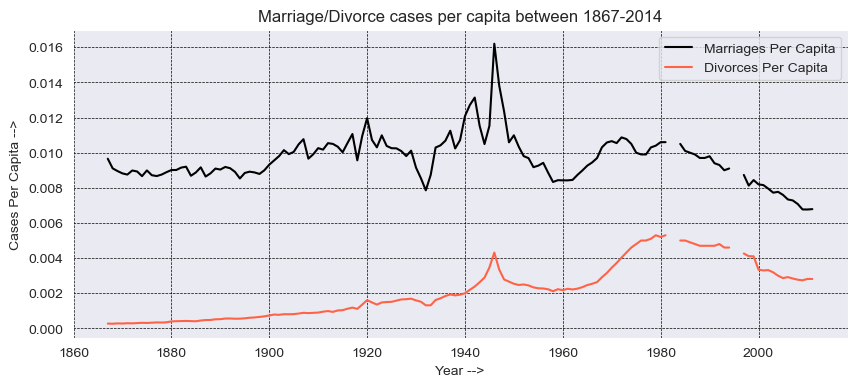

In [63]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 4))
ax.plot(data["Year"], data["marriages_per_capita"], label = "Marriages Per Capita", color = "black")
ax.plot(data["Year"], data["divorces_per_capita"], label = "Divorces Per Capita", color = "tomato")
ax.grid(visible = True, color = "k", linewidth = 0.5, linestyle = "--")
ax.legend()
ax.set_xlabel("Year -->")
ax.set_ylabel("Cases Per Capita -->")
ax.set_title("Marriage/Divorce cases per capita between 1867-2014")
fig.show()

#### Question 7

In [64]:
#Create a vertical bar chart comparing the number of marriages and divorces per
#capita in the U.S. between 1900, 1950, and 2000.
#Don't forget to label your axes!

data = data.loc[data["Year"].isin([1900, 1950, 2000])]
data.head()

,Year,marriages_per_capita,divorces_per_capita
33,1900,0.009317,0.000736
83,1950,0.010990,0.002538
133,2000,0.008198,0.003343


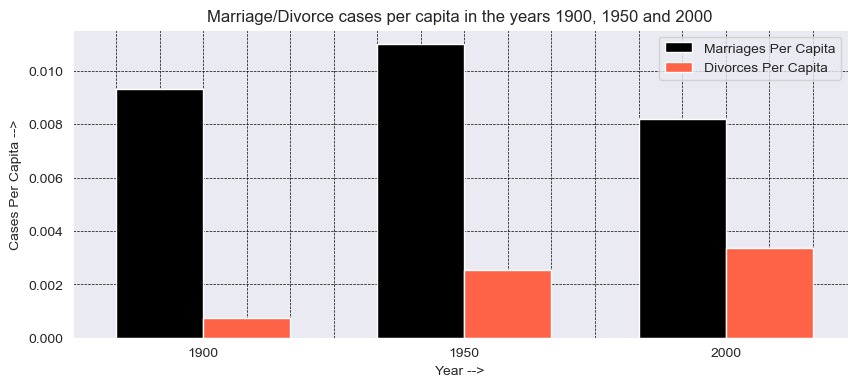

In [65]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 4))
ax.bar(np.arange(1, 8, 3), data["marriages_per_capita"], label = "Marriages Per Capita", color = "black", width = 1)
ax.bar(np.arange(2, 9, 3), data["divorces_per_capita"], label = "Divorces Per Capita", color = "tomato", width = 1)
ax.grid(visible = True, color = "k", linewidth = 0.5, linestyle = "--")
ax.legend()
ax.set_xticks(np.arange(0, 9, 0.5))

xticklabels = []
ticks = np.arange(0, 9, 0.5)
years_idx = np.arange(1.5, 9, 3)
years = np.arange(1900, 2001, 50)
j = 0
for i in ticks:
    if i in years_idx:
        xticklabels.append(str(years[j]))
        j += 1
    else:
        xticklabels.append("")
ax.set_xticklabels(xticklabels)        

ax.set_xlabel("Year -->")
ax.set_ylabel("Cases Per Capita -->")
ax.set_title("Marriage/Divorce cases per capita in the years 1900, 1950 and 2000")
fig.show()

#### Question 8

In [66]:
# Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort
# the actors by their kill count and label each bar with the corresponding actor's name.
# Don't forget to label your axes!

data = pd.read_csv(r"actor_kill_counts.csv")
data.head()

,Actor,Count
0,Arnold Schwarzenegger,369
1,Chow Yun-Fat,295
2,Clint Eastwood,207
3,Clive Owen,194
4,Dolph Lundgren,239


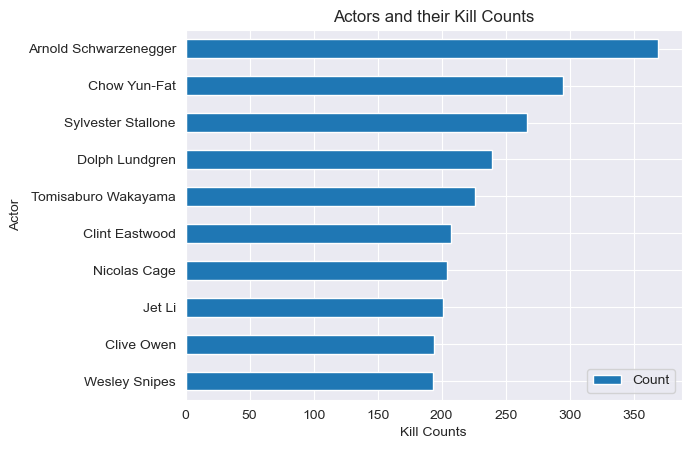

In [67]:
data.sort_values(by = "Count", ascending = True, inplace = True)
data.index = data["Actor"]
data = data[["Count"]]
ax = data.plot.barh()
ax.set_xlabel("Kill Counts")
plt.title("Actors and their Kill Counts")
plt.show()

#### Question 9

In [68]:
# Create a pie chart showing the fraction of all Roman Emperors that were assassinated.
# Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories

data = pd.read_csv(r"roman-emperor-reigns.csv")
data.head()

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide


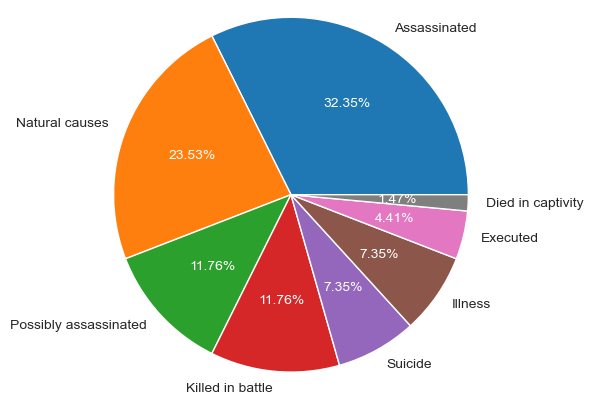

In [69]:
temp = data["Cause_of_Death"].value_counts()
_, _, texts = plt.pie(temp, labels = temp.index, autopct = "%1.2f%%", radius = 1.2)
for text in texts:
    text.set_color("white")
    
plt.show()

#### Question 10

In [70]:
# Create a scatter plot showing the relationship between the total revenue earned by
# arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.
# Don't forget to label your axes!
# Color each dot according to its year.

data = pd.read_csv(r"arcade-revenue-vs-cs-doctorates.csv")
data.head()

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948


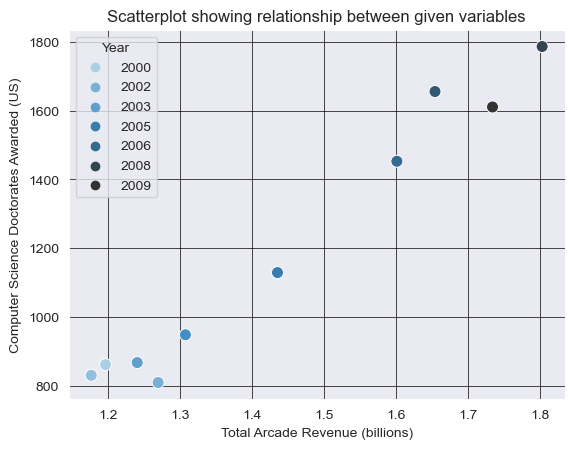

In [71]:
sns.scatterplot(x = "Total Arcade Revenue (billions)", y = "Computer Science Doctorates Awarded (US)",\
                hue = "Year", data = data, palette = "Blues_d", s = 75)
plt.grid(color = "k", linewidth = 0.5)
plt.title("Scatterplot showing relationship between given variables")
plt.show()